# Computer vision - Laboratory

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing
2. Edge detection

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

### 2.1 Image processing with different scales and filters

a) Read the image "face.png" and analyse its histogram. What is the histogram representing for an image?

- Visualize the R, G, and B channels of the image.

- Visualize the histogram of a color image with the following characteristics:

    - Obtain the histogram with 8, 32, 64 and 256 bins. 

    - Visualize the histogram of each channel and the gray level image and compare them. Comment their difference (see image bellow as an example of histogram extraction).

Note: What type should be the image in order to compute the histogram? check using different bins for the histogram. 

Hint : the `exposure` module within the `skimage` library makes the histogram extraction easy!

Help: [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_for_notebook/ex21a.png'>

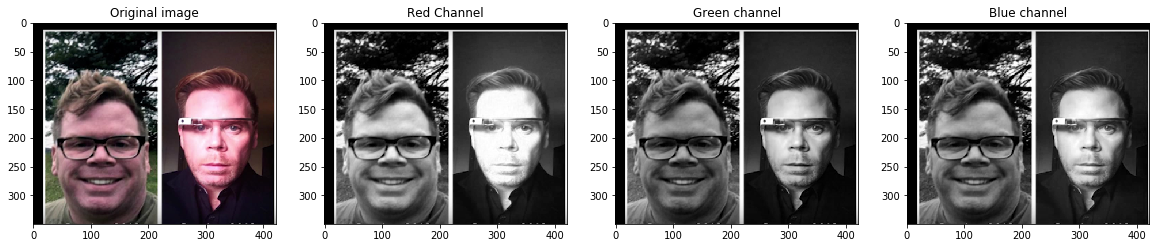

In [1]:
import numpy as np # useful for manipulating matrices
import skimage as ski # useful for image loading and saving
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks
%matplotlib inline
from skimage import io

face = io.imread('images/face.png') # Read image

Red_channel = face[:, :, 0] # Select layer
Green_channel = face[:, :, 1]
Blue_channel = face[:, :, 2]

representation, position = plt.subplots(ncols = 4, nrows = 1, figsize = (20, 10)) # Representation config

position[0].imshow(face)
position[0].set_title('Original image')
position[1].imshow(Red_channel, cmap = 'gray', vmin = 0, vmax = 255)
position[1].set_title('Red Channel')
position[2].imshow(Green_channel, cmap = 'gray', vmin = 0, vmax = 255)
position[2].set_title('Green channel')
position[3].imshow(Blue_channel, cmap = 'gray', vmin = 0, vmax = 255)
position[3].set_title('Blue channel')

plt.show()

[0.0625 0.1875 0.3125 0.4375 0.5625 0.6875 0.8125 0.9375]


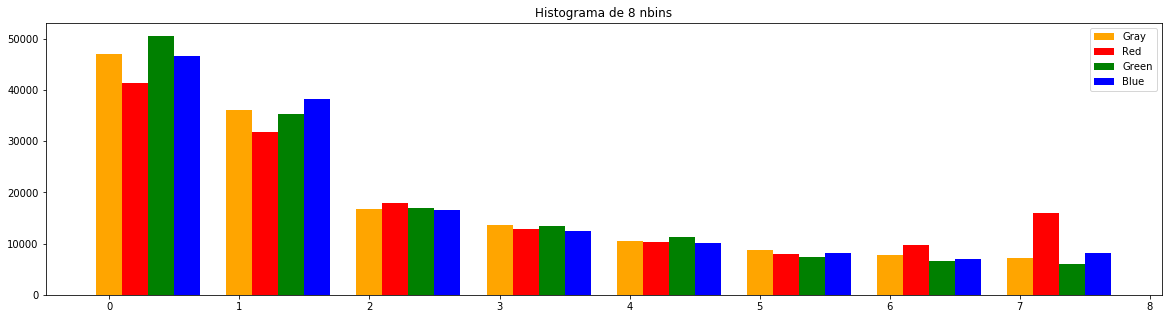

[0.015625 0.046875 0.078125 0.109375 0.140625 0.171875 0.203125 0.234375
 0.265625 0.296875 0.328125 0.359375 0.390625 0.421875 0.453125 0.484375
 0.515625 0.546875 0.578125 0.609375 0.640625 0.671875 0.703125 0.734375
 0.765625 0.796875 0.828125 0.859375 0.890625 0.921875 0.953125 0.984375]


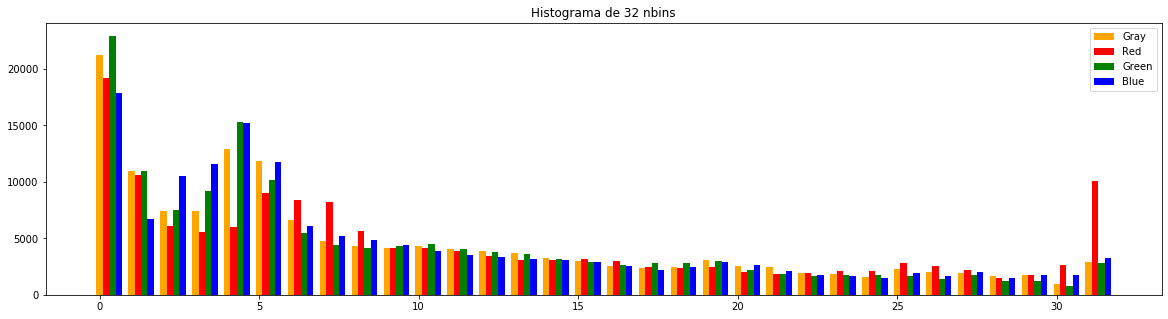

[0.0078125 0.0234375 0.0390625 0.0546875 0.0703125 0.0859375 0.1015625
 0.1171875 0.1328125 0.1484375 0.1640625 0.1796875 0.1953125 0.2109375
 0.2265625 0.2421875 0.2578125 0.2734375 0.2890625 0.3046875 0.3203125
 0.3359375 0.3515625 0.3671875 0.3828125 0.3984375 0.4140625 0.4296875
 0.4453125 0.4609375 0.4765625 0.4921875 0.5078125 0.5234375 0.5390625
 0.5546875 0.5703125 0.5859375 0.6015625 0.6171875 0.6328125 0.6484375
 0.6640625 0.6796875 0.6953125 0.7109375 0.7265625 0.7421875 0.7578125
 0.7734375 0.7890625 0.8046875 0.8203125 0.8359375 0.8515625 0.8671875
 0.8828125 0.8984375 0.9140625 0.9296875 0.9453125 0.9609375 0.9765625
 0.9921875]


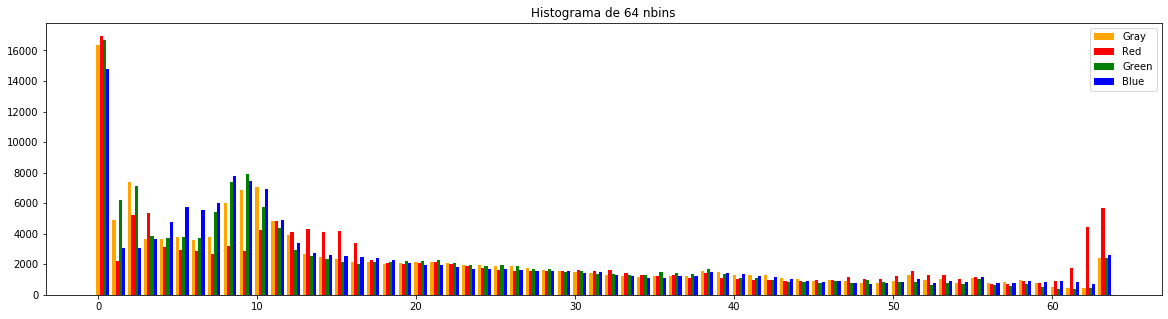

[0.00195312 0.00585938 0.00976562 0.01367188 0.01757812 0.02148438
 0.02539062 0.02929688 0.03320312 0.03710938 0.04101562 0.04492188
 0.04882812 0.05273438 0.05664062 0.06054688 0.06445312 0.06835938
 0.07226562 0.07617188 0.08007812 0.08398438 0.08789062 0.09179688
 0.09570312 0.09960938 0.10351562 0.10742188 0.11132812 0.11523438
 0.11914062 0.12304688 0.12695312 0.13085938 0.13476562 0.13867188
 0.14257812 0.14648438 0.15039062 0.15429688 0.15820312 0.16210938
 0.16601562 0.16992188 0.17382812 0.17773438 0.18164062 0.18554688
 0.18945312 0.19335938 0.19726562 0.20117188 0.20507812 0.20898438
 0.21289062 0.21679688 0.22070312 0.22460938 0.22851562 0.23242188
 0.23632812 0.24023438 0.24414062 0.24804688 0.25195312 0.25585938
 0.25976562 0.26367188 0.26757812 0.27148438 0.27539062 0.27929688
 0.28320312 0.28710938 0.29101562 0.29492188 0.29882812 0.30273438
 0.30664062 0.31054688 0.31445312 0.31835938 0.32226562 0.32617188
 0.33007812 0.33398438 0.33789062 0.34179688 0.34570312 0.3496

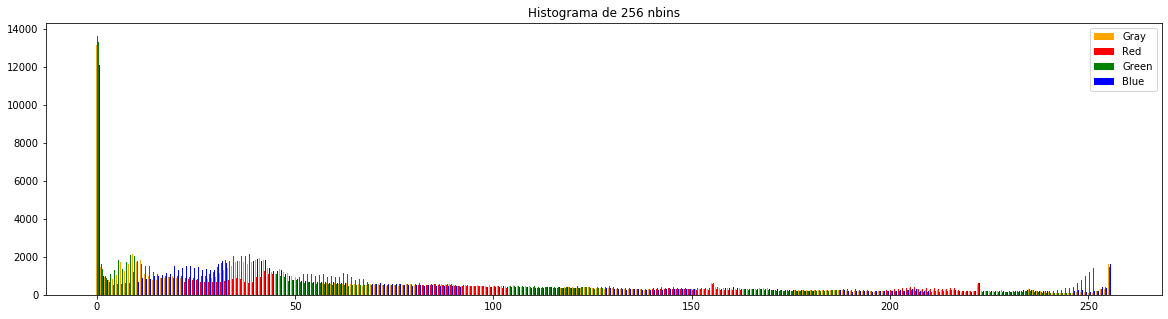

In [2]:
from skimage import data, exposure, img_as_float
from skimage.color import rgb2gray


def histogram_n_bins(image, title, bins):
    '''
    Generates a n bins histogram of RGB channels and Gray scale image
    
    :param image: Image to get the histogram
    :param title: Title for the histogram
    :param bins: Amound of bins to use
    :return: generated n bins histogram
    '''
    
    image_float = img_as_float(image) # Conversion of data type to float
    
    image_gray = rgb2gray(image_float) # Grayscale conversion
    
    # With 32 bins we would divide the range of colors by that nbins amount
    R_channel_hist, bin_centers = exposure.histogram(image_float[:, :, 0], nbins = bins)
    G_channel_hist, bin_centers = exposure.histogram(image_float[:, :, 1], nbins = bins)
    B_channel_hist, bin_centers = exposure.histogram(image_float[:, :, 2], nbins = bins)
    print(bin_centers)
    Gray_hist,bin2_centers4 = exposure.histogram(image_gray, nbins=bins)

    # Ploting the histogram
    fig1,ax1 = plt.subplots(ncols=1, figsize=(20,5))
    
    # Coordinates of the bars we need to apply some separation among them in this case (0.2)
    GRx_cords = np.arange(0,bins,1)
    Rx_cords = np.arange(0.2,bins,1)
    Gx_cords = np.arange(0.4,bins,1)
    Bx_cords = np.arange(0.6,bins,1)

    # Put the Bars in their correspondig coordinates with a color
    ax1.bar(GRx_cords, Gray_hist, 0.2, color='orange')
    ax1.bar(Rx_cords, R_channel_hist, 0.2, color='red')
    ax1.bar(Gx_cords, G_channel_hist, 0.2, color='green')
    ax1.bar(Bx_cords, B_channel_hist, 0.2, color='blue')

    # Set the title and the legend to the histogram
    ax1.set_title(title)
    ax1.legend(['Gray','Red','Green', 'Blue'])
    plt.show()
    
histogram_n_bins(face, 'Histograma de 8 nbins', 8) # Generate histogram for each nbins
histogram_n_bins(face, 'Histograma de 32 nbins', 32)
histogram_n_bins(face, 'Histograma de 64 nbins', 64)
histogram_n_bins(face, 'Histograma de 256 nbins', 256)

## Answer

- The histogram represents the among of bits that contain in each image. By augmenting the nbits, the among of nbits will be more dispersed.

b) Read the image `face.png` (a) and convolve it with a horizontal mask `mask_h1d=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]`(b). Later, substract the obtained image to the original one and save the new image (c). 

***To make your code legible, the resulted images should be shown in a 3x1 plot, with the following titles: a) 'Original image', b) 'Convolved image' and c) 'Difference with the original image'***

Hint: the `convolve` command belongs to the library `ndimage` of `scipy`. 

- Observe and comment how the ***type*** and the ***range of values (max & min)*** changed when different operations have been applied on the image. 

- Plot the different images ((a)original image, (b)intermediate and (c)final) on a figure with multiple images. Put titles on the image plots to explain what each image represents. Is the type of the mask important for the convolution? How is the image changed after the convolution? You need to repeat several times the convolution. Moreover, you need to also use bigger masks in order to observe better the effect of it. Present at least 5 experiments commenting the results obtained and their differences.

Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without values range rescaling.

Note: The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

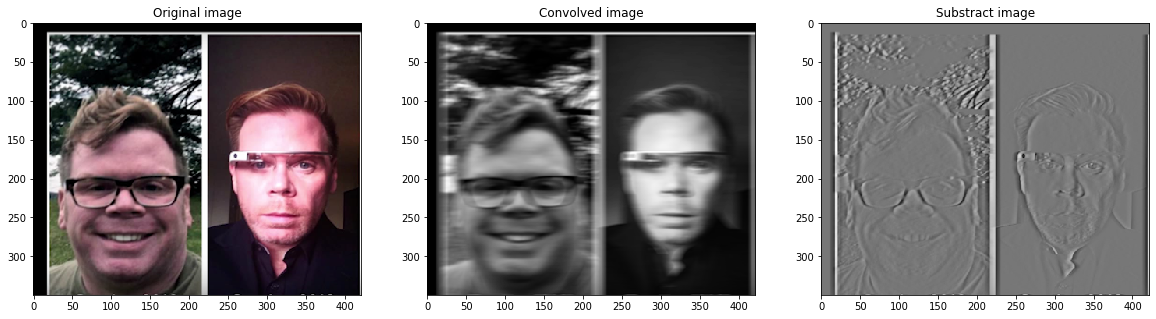

In [3]:
from scipy import ndimage # Import library

face = io.imread("images/face.png") # Read image

mask_h1d = np.ones((1,15)) # Horizontal mask

mask_h1d = mask_h1d/np.sum(mask_h1d) # Normalize mask

face_gray = rgb2gray(face) # Grayscale conversion

convolved_face = ndimage.convolve(face_gray, mask_h1d) # Convolution method

substract_face = face_gray - convolved_face # Substract operation

representation, position = plt.subplots(ncols = 3, nrows = 1, figsize = (20, 10)) # Representation config

position[0].imshow(face)
position[0].set_title('Original image')
position[1].imshow(convolved_face, cmap = 'gray')
position[1].set_title('Convolved image')
position[2].imshow(substract_face, cmap = 'gray')
position[2].set_title('Substract image')

plt.show()

## Answer
Vertical element is clearer than horizontal element.

c) Convolve the image with a vertical one-dimensional mask. Compute and visualize the 3 images (a,b,c).

- Extract the image's histograms and visualize them. 

- Compare the results with those of the previous exercise.

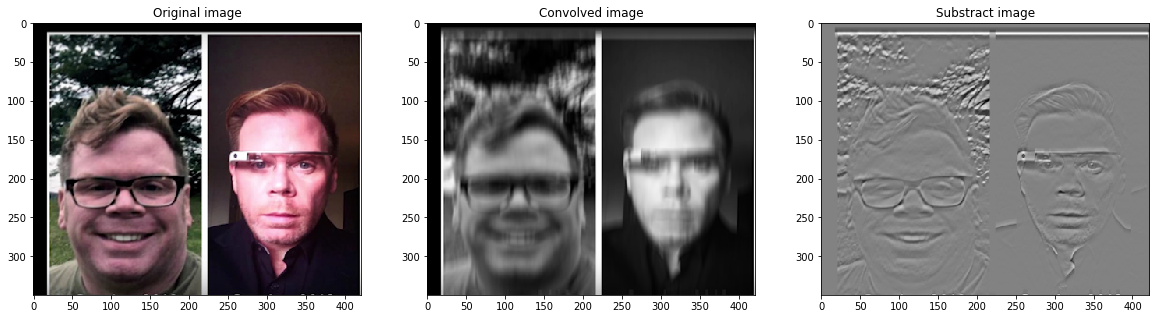

In [4]:
mask_v1d = np.ones((15, 1)) # Vertical mask

mask_v1d = mask_v1d/np.sum(mask_v1d) # Normalize mask

face_gray = rgb2gray(face) # Grayscale conversion

convolved_face = ndimage.convolve(face_gray, mask_v1d) # Convolution method

substract_face = face_gray - convolved_face # Substract operation

representation, position = plt.subplots(ncols = 3, nrows = 1, figsize = (20, 10)) # Representation config

position[0].imshow(face)
position[0].set_title('Original image')
position[1].imshow(convolved_face, cmap = 'gray')
position[1].set_title('Convolved image')
position[2].imshow(substract_face, cmap = 'gray')
position[2].set_title('Substract image')

plt.show()

## Answer
Horizontal element is clearer than vertical element.

d) Convolve the original image with a uniform `two-dimensional` mask of dimensions 15x15 and with all values set to 1. Compute and visualize the 3 images (a,b,c).

- Extract the image's histograms and visualize them. 

- Compare the results with those of the previous exercise.

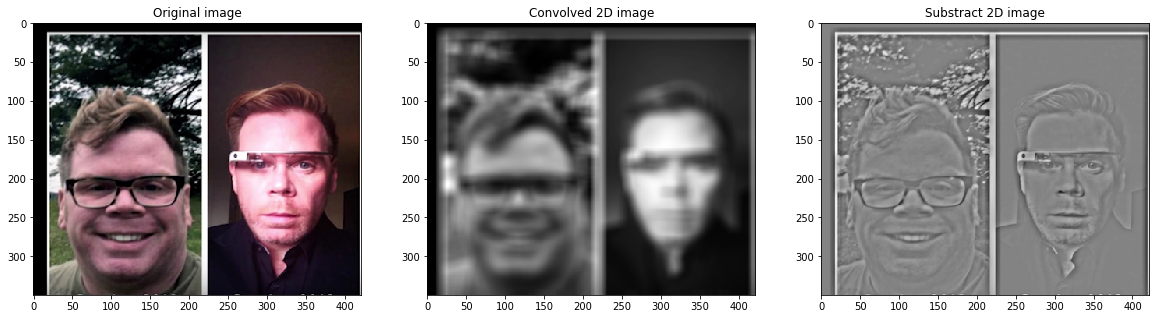

In [5]:
mask_2d = np.ones((15,15))

mask_2d = mask_2d/np.sum(mask_2d)

face_gray = rgb2gray(face)

convolved_face_2d = ndimage.convolve(face_gray, mask_2d)

substract_face_2d = face_gray - convolved_face_2d

representation, position = plt.subplots(ncols = 3, nrows = 1, figsize = (20, 10)) # Representation config

position[0].imshow(face)
position[0].set_title('Original image')
position[1].imshow(convolved_face_2d, cmap = 'gray')
position[1].set_title('Convolved 2D image')
position[2].imshow(substract_face_2d, cmap = 'gray')
position[2].set_title('Substract 2D image')

plt.show()

## Answer
Both horizontal element and vertical element are clear.

e) Can we convolve a color image? 

Implement a 3-channel filter, apply it, visualize the 3 images (a, b and c) and comment the results obtained.

Which is the result obtained when applying a single-channel filter channel by channel separately? Visualize again the three images (original, convolved and difference) and compare the results.

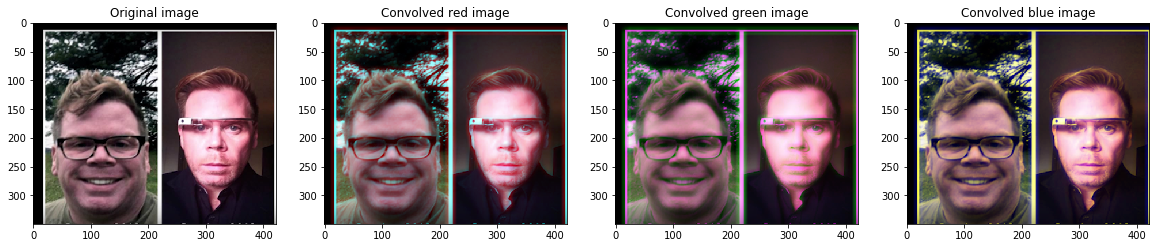

In [6]:
def convolve_rgb (image, mask, channel):
    mask_sum = np.sum(mask)
    norm_mask = mask / mask_sum
    
    image_rgb = np.copy(image)
    
    image_rgb[:,:,channel] = ndimage.convolve(image[:,:,channel], norm_mask) 

    return image_rgb

mask = np.ones((15,15))

channel_r =  convolve_rgb (face, mask, 0)
channel_g =  convolve_rgb (face, mask, 1)
channel_b =  convolve_rgb (face, mask, 2)

representation, position = plt.subplots(ncols = 4, nrows = 1, figsize = (20, 10)) # Representation config

position[0].imshow(face)
position[0].set_title('Original image')
position[1].imshow(channel_r, cmap = 'gray')
position[1].set_title('Convolved red image')
position[2].imshow(channel_g, cmap = 'gray')
position[2].set_title('Convolved green image')
position[3].imshow(channel_b, cmap = 'gray')
position[3].set_title('Convolved blue image')

plt.show()

## Answer

The result of these imaged differs in the subtraction of the color layer (channel).

Given a color image (im), what is the difference between ***a*** and ***b*** ?
   
*** a) ***

im_2=np.array(im, dtype='float')


*** b) ***

im_2=np.array(im)


im_2=img_as_float(im_2)

## Answer

The part a) is loaded directly as float, while the part b) produce a converison to float, as a consequence the precision of the image can be reduced.

f) Change the size of the image a) reducing it 10 times ***and*** b) augmenting it two times. 

Observe if the histogram (i.e. nbins = 32) of the new images changed, and comment what happens and why. 

Apply the convolution on the three images with the same two dimensional uniform mask and comment the results.
Note: Observe what is the output of the command `resize`.


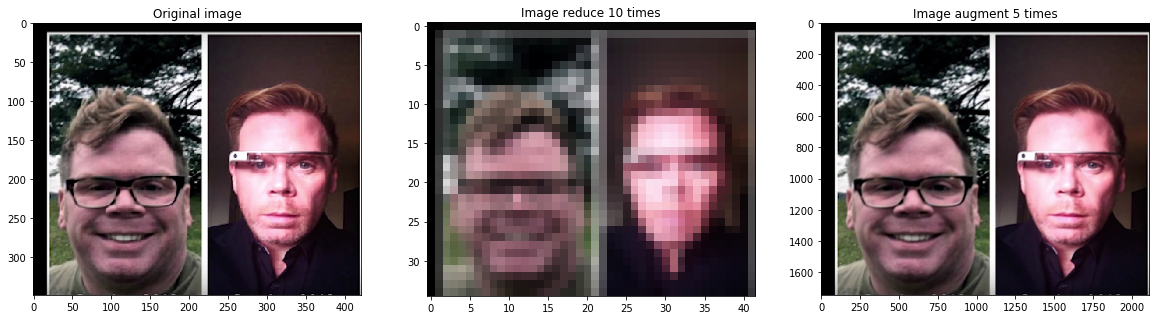

In [7]:
from skimage.transform import resize

face = io.imread("images/face.png")

reduce_10 = resize(face,(round(face.shape[0]/10),round(face.shape[1]/10))) # Reduce 10 times

augmente_5 = resize(face,(round(face.shape[0]*5),round(face.shape[1]*5))) # Augment 5 times

representation, position = plt.subplots(ncols=3, nrows=1,figsize=(20,10))
position[0].imshow(face)
position[0].set_title("Original image")
position[1].imshow(reduce_10)
position[1].set_title('Image reduce 10 times')
position[2].imshow(augmente_5)
position[2].set_title('Image augment 5 times')

plt.show()

[0.015625 0.046875 0.078125 0.109375 0.140625 0.171875 0.203125 0.234375
 0.265625 0.296875 0.328125 0.359375 0.390625 0.421875 0.453125 0.484375
 0.515625 0.546875 0.578125 0.609375 0.640625 0.671875 0.703125 0.734375
 0.765625 0.796875 0.828125 0.859375 0.890625 0.921875 0.953125 0.984375]


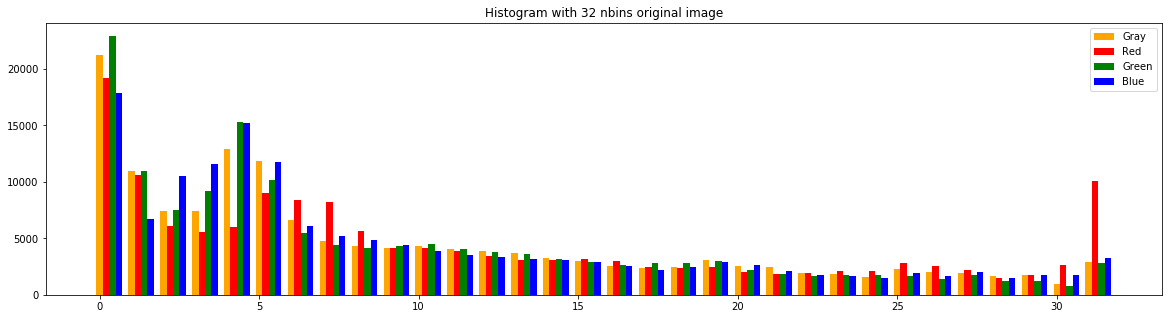

[0.0151348  0.04540441 0.07567402 0.10594363 0.13621324 0.16648284
 0.19675245 0.22702206 0.25729167 0.28756127 0.31783088 0.34810049
 0.3783701  0.40863971 0.43890931 0.46917892 0.49944853 0.52971814
 0.55998775 0.59025735 0.62052696 0.65079657 0.68106618 0.71133578
 0.74160539 0.771875   0.80214461 0.83241422 0.86268382 0.89295343
 0.92322304 0.95349265]


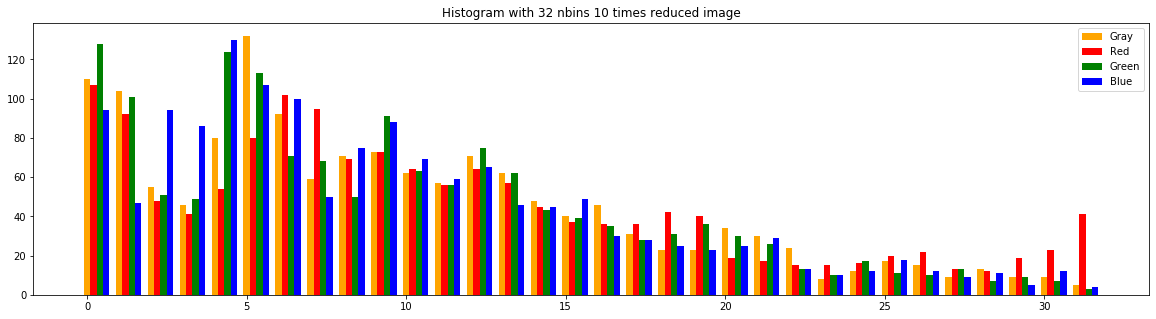

[0.015625 0.046875 0.078125 0.109375 0.140625 0.171875 0.203125 0.234375
 0.265625 0.296875 0.328125 0.359375 0.390625 0.421875 0.453125 0.484375
 0.515625 0.546875 0.578125 0.609375 0.640625 0.671875 0.703125 0.734375
 0.765625 0.796875 0.828125 0.859375 0.890625 0.921875 0.953125 0.984375]


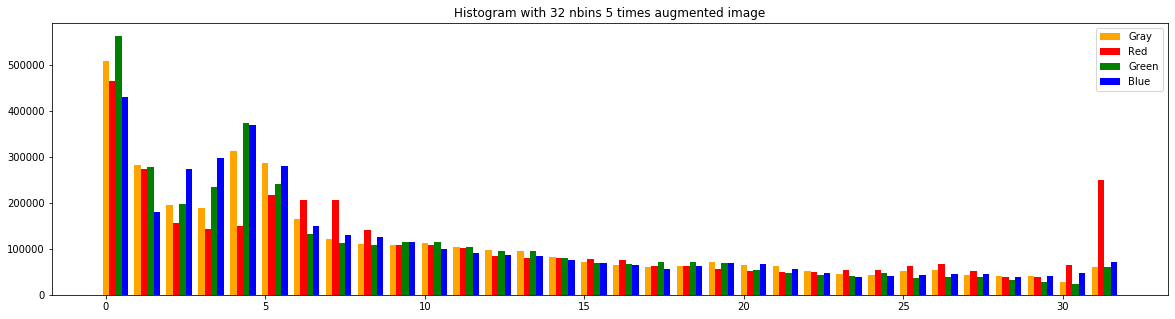

In [8]:
histogram_n_bins(face, 'Histogram with 32 nbins original image', 32)
histogram_n_bins(reduce_10, 'Histogram with 32 nbins 10 times reduced image', 32)
histogram_n_bins(augmente_5, 'Histogram with 32 nbins 5 times augmented image', 32)

## Answer
    The difference between the three histogram is by the among of bits that have in each column.


#### 2.2 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the original image of the previous exercise:

- Gaussian kernel with sigma = 1
- Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
- Median filter.

Comment the effect of using different kinds of filters on the original image.

Hint: use the skimage.filters function for creating the different filters.

C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


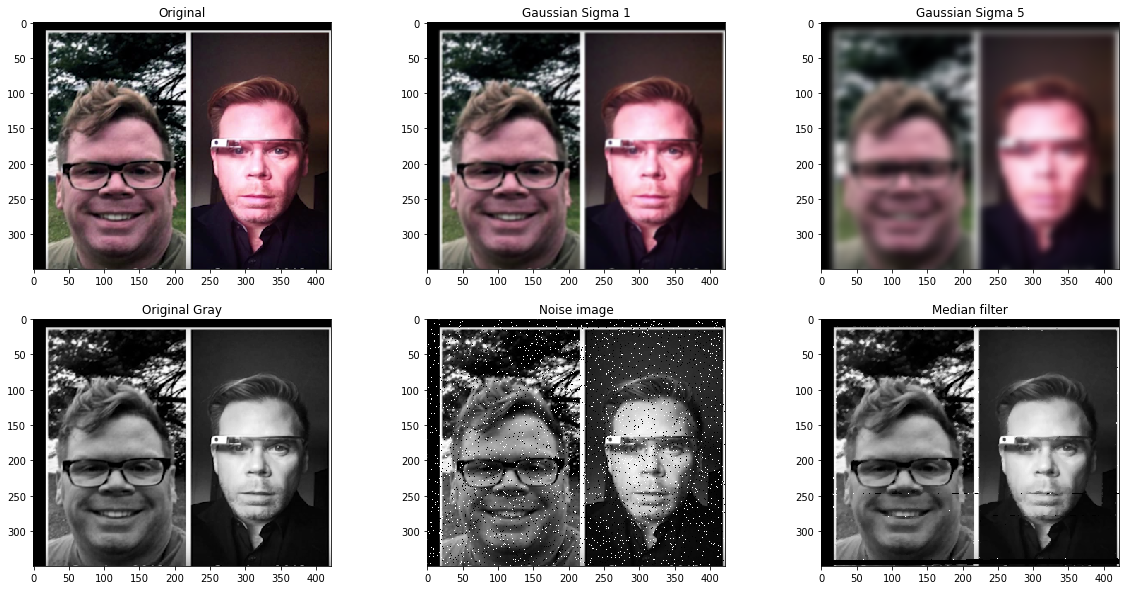

In [9]:
from skimage import filters, util
import numpy as np

face = io.imread('images/face.png')

gaus_face = filters.gaussian(face,1,multichannel = True)
gaus_face2 = filters.gaussian(face,5,multichannel = True)

face_gray = rgb2gray(face)

noise = util.random_noise(face_gray,mode='s&p')
median_face = noise.copy()

m = np.ones((6,6))
msum = np.sum(m)
mk = m/msum

filters.median(noise,out=median_face, mask = mk)

representation, position = plt.subplots(ncols=3, nrows=2,figsize=(20,10))
position[0][0].imshow(face)
position[0][0].set_title('Original')
position[0][1].imshow(gaus_face)
position[0][1].set_title('Gaussian Sigma 1')
position[0][2].imshow(gaus_face2)
position[0][2].set_title('Gaussian Sigma 5')
position[1][0].imshow(face_gray, cmap='gray')
position[1][0].set_title('Original Gray')
position[1][1].imshow(noise,cmap='gray')
position[1][1].set_title('Noise image')
position[1][2].imshow(median_face,cmap='gray')
position[1][2].set_title('Median filter')

plt.show()

## ANSWER:
- Comment the effect of using different kinds of filters on the original image.
 
     We can observe how we can obtain different noises in an image with different sigma values in the Gaussian filter. With a very high sigma we can hardly appreciate the image

**(Optional)** Apply the smoothing on some other images and present their results.

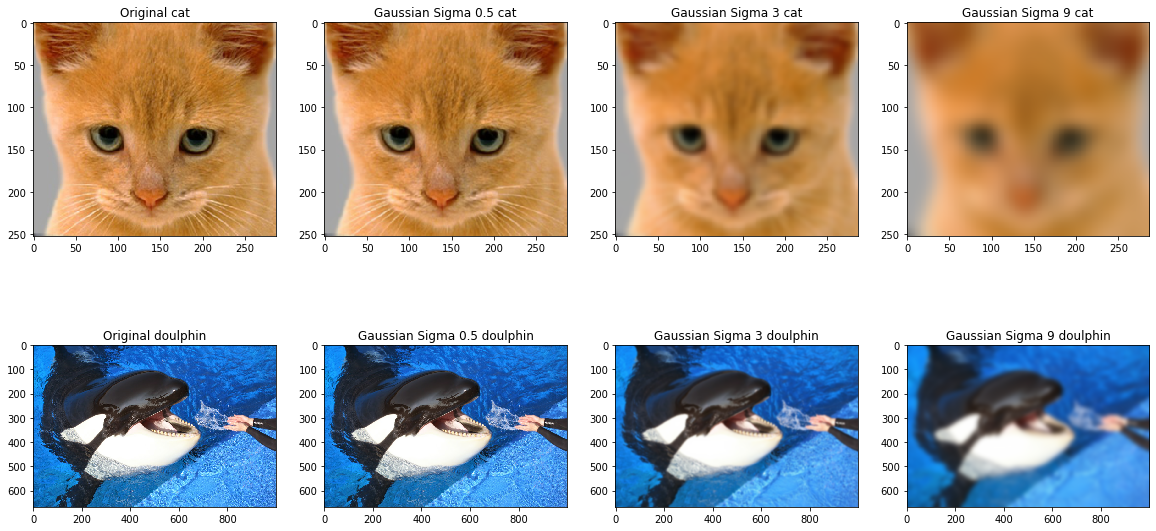

In [10]:
cat = io.imread('images/cat.jpg')
doulphin = io.imread('images/doulphin.jpg')

gauss_cat = filters.gaussian(cat, 0.5, multichannel = True) # Gaussian filter with different sigma
gauss_doulphin = filters.gaussian(doulphin, 0.5, multichannel = True)
gauss_cat2 = filters.gaussian(cat, 3, multichannel = True)
gauss_doulphin2 = filters.gaussian(doulphin,3,multichannel = True)
gauss_cat3 = filters.gaussian(cat, 9, multichannel = True)
gauss_doulphin3 = filters.gaussian(doulphin, 9, multichannel = True)

representation, position = plt.subplots(ncols = 4, nrows = 2, figsize = (20, 10))
position[0][0].imshow(cat)
position[0][0].set_title('Original cat')
position[0][1].imshow(gauss_cat)
position[0][1].set_title('Gaussian Sigma 0.5 cat')
position[0][2].imshow(gauss_cat2)
position[0][2].set_title('Gaussian Sigma 3 cat')
position[0][3].imshow(gauss_cat3)
position[0][3].set_title('Gaussian Sigma 9 cat')
position[1][0].imshow(doulphin)
position[1][0].set_title('Original doulphin')
position[1][1].imshow(gauss_doulphin)
position[1][1].set_title('Gaussian Sigma 0.5 doulphin')
position[1][2].imshow(gauss_doulphin2)
position[1][2].set_title('Gaussian Sigma 3 doulphin')
position[1][3].imshow(gauss_doulphin3)
position[1][3].set_title('Gaussian Sigma 9 doulphin')

plt.show()

### 2.3 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

Apply the different contour extraction tecniques introduced during the theory session (roberts, prewitt, sobel and canny). Also, find the optimal parameteres for each of them.

Use subplot and title to visualize the results.

Which is the best countour detection technique? 

Which are the optimal parameters for this image? 

Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

Hint: use skimage.feature.canny for applying the canny filter

Optional: Superimpose the contours over the image.

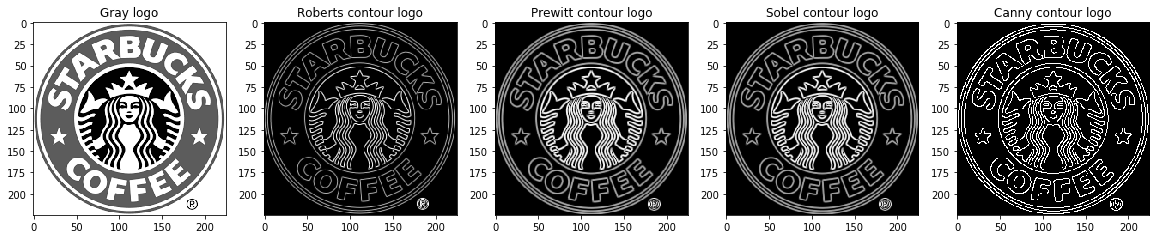

In [11]:
from skimage.filters import roberts, prewitt, sobel # Import libraries
from skimage.color import rgb2gray
from skimage import feature

logo = io.imread('images/logo.png') # Read image

logo_gray = rgb2gray(logo) # Grayscale conversion

contour_roberts = roberts(logo_gray) # Apply methods
contour_prewitt = prewitt(logo_gray)
contour_sobel = sobel(logo_gray)
contour_canny = feature.canny(logo_gray)

representation, position = plt.subplots(ncols = 5, nrows = 1, figsize = (20,10)) # Representation config
position[0].imshow(logo_gray, cmap = 'gray')
position[0].set_title('Gray logo')
position[1].imshow(contour_roberts, cmap = 'gray')
position[1].set_title('Roberts contour logo')
position[2].imshow(contour_prewitt, cmap = 'gray')
position[2].set_title('Prewitt contour logo')
position[3].imshow(contour_sobel, cmap = 'gray')
position[3].set_title('Sobel contour logo')
position[4].imshow(contour_canny, cmap = 'gray')
position[4].set_title('Canny contour logo')

plt.show()

## ANSWER:

- Which is the best countour detection technique?

    Prewwit and sobel detect better the contour due to the continuity of the edges.
    

- Which are the optimal parameters for this image?

    The parameters of the processing used are set by default. The cercle edge detection is important for this image so we think the Sobel and Prewitt are the correct methods.
    

- Is it necessary to normalize the mask as we do in the filtering applied for the smoothing?

    We need to normalize the mask in order to perform the correct result.

b)	Repeate the experiment with other images, you can use the ones included in the folder **images**. Comment if the parameters need to be changed for the different images.

- Are the contours improved if the image is previously smoothed ? 
- Which are the limitations of the different images contour extraction?

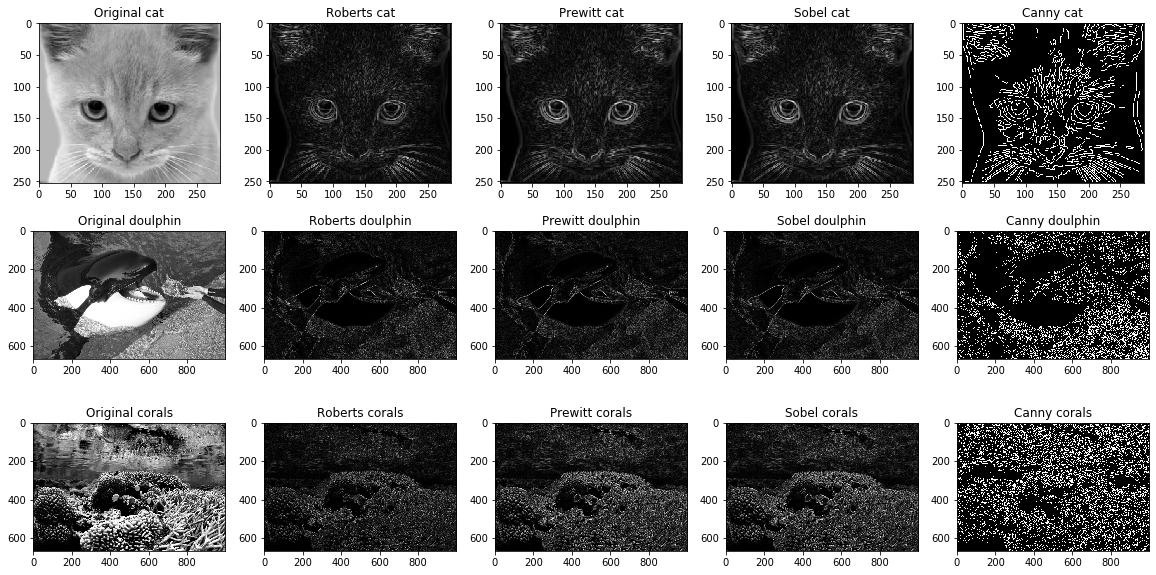

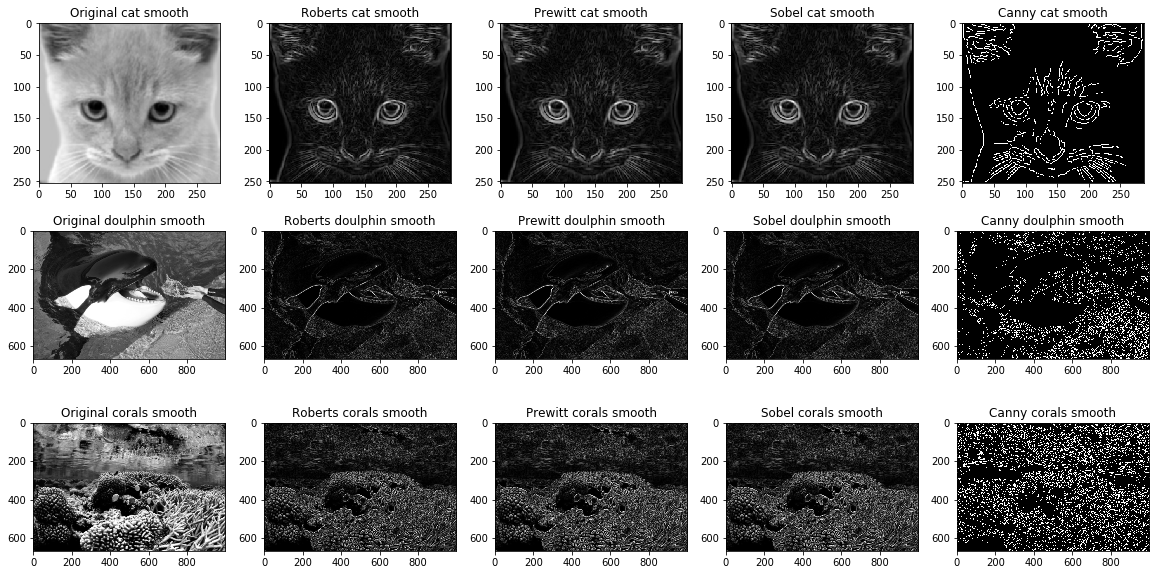

In [12]:
from skimage import filters # Import libraries

cat = io.imread('images/cat.jpg')
doulphin = io.imread('images/doulphin.jpg')
corals = io.imread('images/corals.jpg')

cat_gray = rgb2gray(cat)
doulphin_gray = rgb2gray(doulphin)
corals_gray = rgb2gray(corals)

edge_roberts_cat = roberts(cat_gray)
edge_prewitt_cat = prewitt(cat_gray)
edge_sobel_cat = sobel(cat_gray)
edge_canny_cat = feature.canny(cat_gray)

edge_roberts_doulphin = roberts(doulphin_gray)
edge_prewitt_doulphin = prewitt(doulphin_gray)
edge_sobel_doulphin = sobel(doulphin_gray)
edge_canny_doulphin = feature.canny(doulphin_gray)

edge_roberts_corals = roberts(corals_gray)
edge_prewitt_corals = prewitt(corals_gray)
edge_sobel_corals = sobel(corals_gray)
edge_canny_corals = feature.canny(corals_gray)

representation, position = plt.subplots(ncols=5, nrows=3,figsize=(20,10))
position[0][0].imshow(cat_gray, cmap='gray')
position[0][0].set_title('Original cat')
position[0][1].imshow(edge_roberts_cat, cmap='gray')
position[0][1].set_title('Roberts cat')
position[0][2].imshow(edge_prewitt_cat, cmap='gray')
position[0][2].set_title('Prewitt cat')
position[0][3].imshow(edge_sobel_cat, cmap='gray')
position[0][3].set_title('Sobel cat')
position[0][4].imshow(edge_canny_cat, cmap='gray')
position[0][4].set_title('Canny cat')

position[1][0].imshow(doulphin_gray, cmap='gray')
position[1][0].set_title('Original doulphin')
position[1][1].imshow(edge_roberts_doulphin, cmap='gray')
position[1][1].set_title('Roberts doulphin')
position[1][2].imshow(edge_prewitt_doulphin, cmap='gray')
position[1][2].set_title('Prewitt doulphin')
position[1][3].imshow(edge_sobel_doulphin , cmap='gray')
position[1][3].set_title('Sobel doulphin')
position[1][4].imshow(edge_canny_doulphin , cmap='gray')
position[1][4].set_title('Canny doulphin')

position[2][0].imshow(corals_gray, cmap='gray')
position[2][0].set_title('Original corals')
position[2][1].imshow(edge_roberts_corals, cmap='gray')
position[2][1].set_title('Roberts corals')
position[2][2].imshow(edge_prewitt_corals, cmap='gray')
position[2][2].set_title('Prewitt corals')
position[2][3].imshow(edge_sobel_corals, cmap='gray')
position[2][3].set_title('Sobel corals')
position[2][4].imshow(edge_canny_corals, cmap='gray')
position[2][4].set_title('Canny corals')

plt.show()

# Smoothen methods applied
cat_smooth = filters.gaussian(cat_gray)
doulphin_smooth = filters.gaussian(doulphin_gray)
corals_smooth = filters.gaussian(corals_gray)

edge_roberts_cat = roberts(cat_smooth)
edge_prewitt_cat = prewitt(cat_smooth)
edge_sobel_cat = sobel(cat_smooth)
edge_canny_cat = feature.canny(cat_smooth)

edge_roberts_doulphin = roberts(doulphin_smooth)
edge_prewitt_doulphin = prewitt(doulphin_smooth)
edge_sobel_doulphin = sobel(doulphin_smooth)
edge_canny_doulphin = feature.canny(doulphin_smooth)

edge_roberts_corals = roberts(corals_smooth)
edge_prewitt_corals = prewitt(corals_smooth)
edge_sobel_corals = sobel(corals_smooth)
edge_canny_corals = feature.canny(corals_smooth)

representation, position = plt.subplots(ncols=5, nrows=3,figsize=(20,10))
position[0][0].imshow(cat_smooth, cmap='gray')
position[0][0].set_title('Original cat smooth')
position[0][1].imshow(edge_roberts_cat, cmap='gray')
position[0][1].set_title('Roberts cat smooth')
position[0][2].imshow(edge_prewitt_cat, cmap='gray')
position[0][2].set_title('Prewitt cat smooth')
position[0][3].imshow(edge_sobel_cat, cmap='gray')
position[0][3].set_title('Sobel cat smooth')
position[0][4].imshow(edge_canny_cat, cmap='gray')
position[0][4].set_title('Canny cat smooth')

position[1][0].imshow(doulphin_smooth, cmap='gray')
position[1][0].set_title('Original doulphin smooth')
position[1][1].imshow(edge_roberts_doulphin, cmap='gray')
position[1][1].set_title('Roberts doulphin smooth')
position[1][2].imshow(edge_prewitt_doulphin, cmap='gray')
position[1][2].set_title('Prewitt doulphin smooth')
position[1][3].imshow(edge_sobel_doulphin , cmap='gray')
position[1][3].set_title('Sobel doulphin smooth')
position[1][4].imshow(edge_canny_doulphin , cmap='gray')
position[1][4].set_title('Canny doulphin smooth')

position[2][0].imshow(corals_smooth, cmap='gray')
position[2][0].set_title('Original corals smooth')
position[2][1].imshow(edge_roberts_corals, cmap='gray')
position[2][1].set_title('Roberts corals smooth')
position[2][2].imshow(edge_prewitt_corals, cmap='gray')
position[2][2].set_title('Prewitt corals smooth')
position[2][3].imshow(edge_sobel_corals, cmap='gray')
position[2][3].set_title('Sobel corals smooth')
position[2][4].imshow(edge_canny_corals, cmap='gray')
position[2][4].set_title('Canny corals smooth')

plt.show()

## ANSWER:
- Are the contours improved if the image is previously smoothed ? 
    
    The contour edge detection of smoothed image seems to be more defined as the edges get more width.

    
- Which are the limitations of the different images contour extraction?
    
    The limitation of contour extraction happens when the contours of the image are too many and colors do not quite diferential value.
    

d) Optional: How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results.


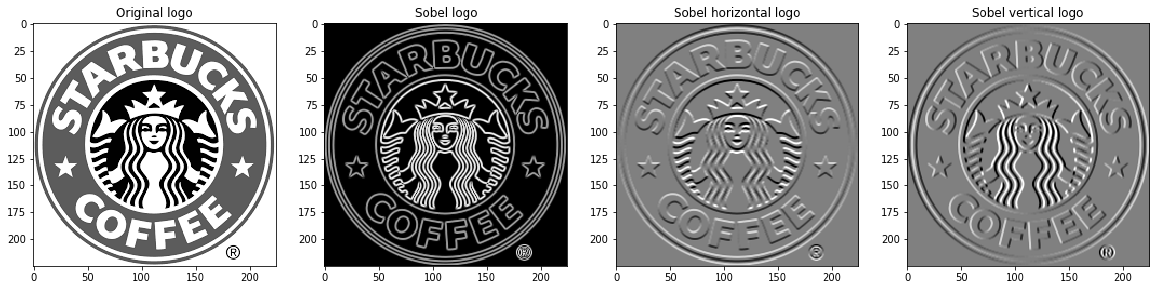

In [13]:
from skimage.filters import sobel, sobel_v, sobel_h

logo = io.imread('images/logo.png')

logo_gray = rgb2gray(logo)

sobel = sobel(logo_gray)
sobel_h = sobel_h(logo_gray)
sobel_v = sobel_v(logo_gray)

representation, position = plt.subplots(ncols=4, nrows=1,figsize=(20,10))
position[0].imshow(logo_gray, cmap = 'gray')
position[0].set_title('Original logo')
position[1].imshow(sobel, cmap='gray')
position[1].set_title('Sobel logo')
position[2].imshow(sobel_h, cmap='gray')
position[2].set_title('Sobel horizontal logo')
position[3].imshow(sobel_v, cmap='gray')
position[3].set_title('Sobel vertical logo')

plt.show()

### 2.4 Applying smoothing in order to obtain hybrid images

a) Given `Einstein.jpg` and `monroe.jpg` images, compute the hybrid image and visualize it.

By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

Hybrid (I1, I2) = L(I1) + H(I2)

Apply fspecial('gaussian,hsize,sigma') with the formula hsize=4*sigma+1. What does hsize mean?

Hint: In order to highlight the effect, in the L(I1) image you should define a lower sigma, while for the H(I1) you should use a higher one. 

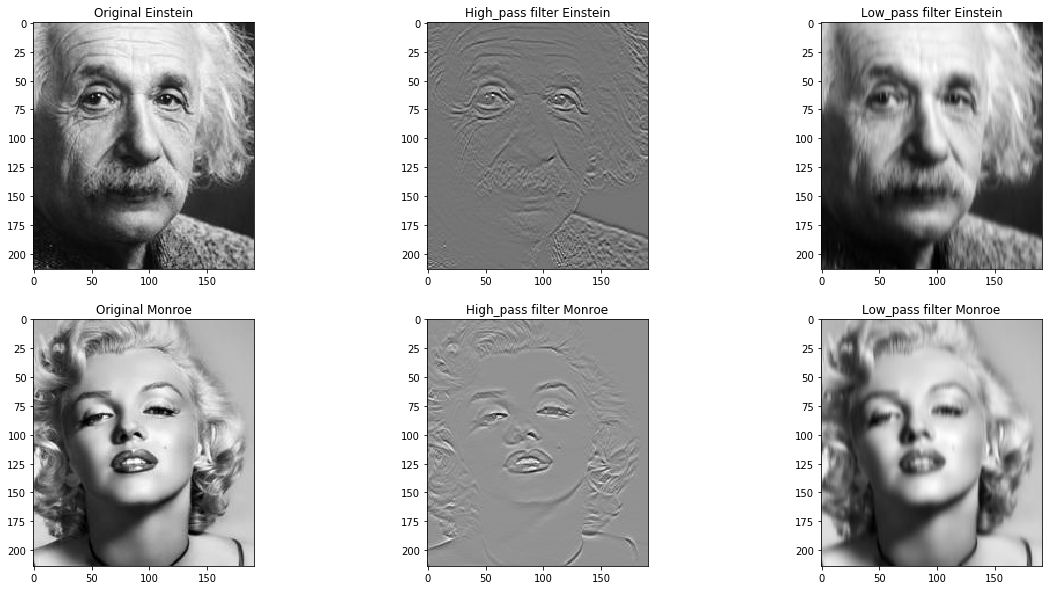

In [14]:
einstein = io.imread('images/Einstein.jpg')
monroe = io.imread('images/monroe.jpg')

einstein_float = img_as_float(einstein)
monroe_float = img_as_float(monroe)

low_pass_einstein = filters.gaussian(einstein_float, 2, multichannel = True) # Low pass monroe with gaussian filter, sigma 2
high_pass_einstein = einstein_float - low_pass_einstein # High pass by substraction

low_pass_monroe = filters.gaussian(monroe_float, 2, multichannel = True) # Low pass monroe with gaussian filter, sigma 2
high_pass_monroe = monroe_float - low_pass_monroe # High pass by substraction

representation, position = plt.subplots(ncols = 3, nrows = 2, figsize = (20, 10))
position[0][0].imshow(einstein_float, cmap='gray')
position[0][0].set_title('Original Einstein')
position[0][1].imshow(high_pass_einstein, cmap='gray')
position[0][1].set_title('High_pass filter Einstein')
position[0][2].imshow(low_pass_einstein, cmap='gray')
position[0][2].set_title('Low_pass filter Einstein')
position[1][0].imshow(monroe_float, cmap='gray')
position[1][0].set_title('Original Monroe')
position[1][1].imshow(high_pass_monroe, cmap='gray')
position[1][1].set_title('High_pass filter Monroe')
position[1][2].imshow(low_pass_monroe, cmap='gray')
position[1][2].set_title('Low_pass filter Monroe')

plt.show()

b) Combine both hybrid images and visualize them. Analyze which is the best way of showing it if our aim is to see Marylin Monroe. Additionally, rescale the image to different size and comment the results. Present the different visualizations of the experiment performed.

Optional : compute hybrid images from other images. Apply it over color images.

C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


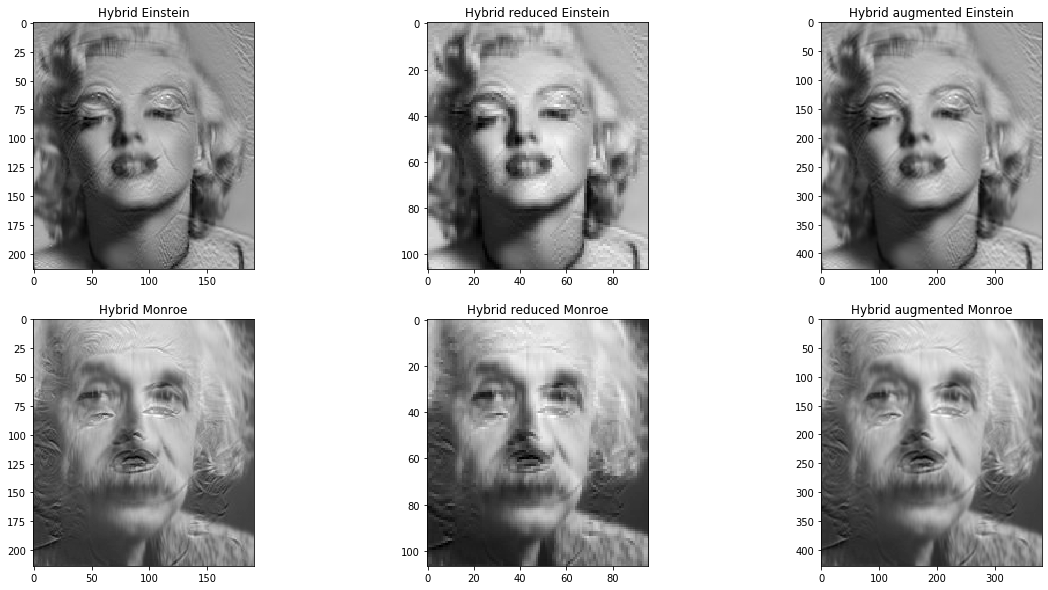

In [15]:
from skimage.transform import rescale

hybrid_monroe = high_pass_monroe + low_pass_einstein # Hybrid sum
hybrid_einstein = high_pass_einstein + low_pass_monroe

hybrid_einstein_r = rescale(hybrid_einstein, .5) # Rescale of hybrid image
hybrid_einstein_a = rescale(hybrid_einstein, 2)

hybrid_monroe_r = rescale(hybrid_monroe, .5)
hybrid_monroe_a = rescale(hybrid_monroe, 2)

representation, position = plt.subplots(ncols=3, nrows=2,figsize=(20,10))
position[0][0].imshow(hybrid_einstein, cmap='gray')
position[0][0].set_title('Hybrid Einstein')
position[1][0].imshow(hybrid_monroe, cmap='gray')
position[1][0].set_title('Hybrid Monroe')
position[0][1].imshow(hybrid_einstein_r, cmap='gray')
position[0][1].set_title('Hybrid reduced Einstein')
position[1][1].imshow(hybrid_monroe_r, cmap='gray')
position[1][1].set_title('Hybrid reduced Monroe')
position[0][2].imshow(hybrid_einstein_a, cmap='gray')
position[0][2].set_title('Hybrid augmented Einstein')
position[1][2].imshow(hybrid_monroe_a, cmap='gray')
position[1][2].set_title('Hybrid augmented Monroe')

plt.show()

## ANSWER:
- Analyze which is the best way of showing it if our aim is to see Marylin Monroe? 
    
    The best way to visualize Monroe is to sum the high pass Monroe with low pass Einstein and with augmented rescalation.
    

## 2.5 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg



<IPython.core.display.Javascript object>


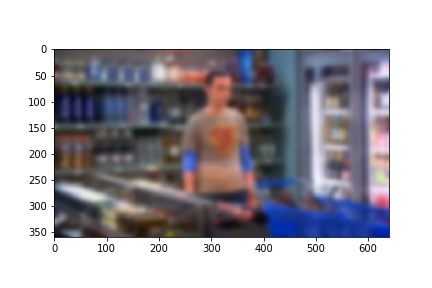

In [18]:
import skimage
from skimage import io
import matplotlib.pyplot as plt
from skimage.filters import gaussian

llista_imatges = []
ic = io.ImageCollection('images/bigbangcollection/*.png')

for i in ic:    
    im_gaussian = gaussian(i, sigma=5,multichannel=True)
    llista_imatges.append(im_gaussian)
    
        # Reading a sequence of images from a folder

import matplotlib.animation as animation
%matplotlib nbagg 
    #Changing the pluggin is necessary always when visualizing a video!

i=0       #Inicializing the video display
fig = plt.figure()  # Create figure
im = plt.imshow(llista_imatges[i], animated=True) #Visualize the first image

def updatefig1(i):   #Updating the frame visualization
    if i>200:
        im.set_array(llista_imatges[i-200]) #Changing the content of the canvas
    else:
        im.set_array(ic[i])
    return im, #to return a tuple!

ani = animation.FuncAnimation(fig, updatefig1, interval=5, blit=False, frames=400, repeat= False)

## Delivery

Compressed file **P2_Student1_Student2.zip** that includes:
- The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
- The images used that are not provided in P2.zip.

**Deadline (Campus Virtual): October 15, 11:00 p.m.** 
